In [1]:
import csv
import pandas as pd
from src import common, features

In [11]:
isnull_columns = [
    'revenue_in_millions',
    'profits_in_millions',
    'age_in_years',
    'return_on_assets',
    'csr_index',
]

min_columns = {
    'pp_n_sentence': 1,
    'n_employees': 0,
    'csr_index_last_available_year': 2017,
}

ig_feature_relational_practises = {
    'name': 'relational_ig_practises',
    'features': {
        'pp_ambiquity_score': {
            'type': 'continues',
            'best_value': 0,
        },
        'pp_gunning_fog_index': {
            'type': 'continues',
            'best_value': 0,
        },
        'pp_contact_option': {
            'type': 'binary',
            'best_value': 1,
        },
        'pp_existence_of_a_transparency_report': {
            'type': 'binary',
            'best_value': 1,
        },
    }
}

ig_feature_formal_practises = {
    'name': 'formal_ig_practises',
    'features': {
        'dummy_pp_legislation_complied_with_standard': {
            'type': 'binary',
            'best_value': 0,
        },
        'pp_third_party_sharing': {
            'type': 'binary',
            'best_value': 0,
        },
        'pp_existence_of_a_data_protection_officer': {
            'type': 'binary',
            'best_value': 1,
        },
        'pp_iso_type': {
            'type': 'binary',
            'best_value': 1,
        },
    }
}

dummy_columns = ['pp_legislation_complied_with', 'sector']

In [12]:
dfraw = pd.read_csv('../data/modelinput/information_governance_full_dataset.csv')

In [13]:
dfraw.dtypes

firmhash                                       int64
firm                                          object
url                                           object
ranking                                        int64
industry                                      object
sector                                        object
revenue_in_millions                          float64
profits_in_millions                          float64
market_value_in_millions                     float64
n_employees                                    int64
reputation_score_2020                        float64
reputation_score_2019                        float64
reputation_score_growth                      float64
stock_turnover_last_available_year             int64
date_of_incorporation                         object
stock_turnover                               float64
age_in_years                                 float64
return_on_assets                             float64
pp_n_sentence                                f

In [14]:
waterfall_on_selection = {}

waterfall_on_selection['Raw sample'] = dfraw['firmhash'].nunique()

df1 = dfraw.loc[lambda x: ~x['reputation_score_2020'].isnull()]
waterfall_on_selection['With reputation 2020'] = df1['firmhash'].nunique()

df2 = df1.loc[lambda x: ~x['reputation_score_2019'].isnull()]
waterfall_on_selection['With reputation 2019'] = df2['firmhash'].nunique()

df3 = df2.loc[lambda x: x['pp_privacy_policy_exists']==1]
waterfall_on_selection['With privacy policy available'] = df3['firmhash'].nunique()

df4 = common._filter_out_nulls(df3, isnull_columns)
df_clean = common._filter_on_mins(df4, min_columns)

df_clean = common.create_dummies(df_clean, dummy_columns)

df_clean = features.combine_features(df_clean, ig_feature_relational_practises)
df_clean = features.combine_features(df_clean, ig_feature_formal_practises)

df_clean.to_csv('../data/modelinput/information_governance_clean_dataset.csv',
                index=False,
                quoting=csv.QUOTE_NONNUMERIC,
                quotechar='"')

waterfall_on_selection['With other variables available'] = df_clean['firmhash'].nunique()

waterfall_on_selection

revenue_in_millions: 0 rows are filtered out
profits_in_millions: 0 rows are filtered out
age_in_years: 7 rows are filtered out
return_on_assets: 3 rows are filtered out
csr_index: 0 rows are filtered out
pp_n_sentence: 1 rows are filtered out
n_employees: 0 rows are filtered out
csr_index_last_available_year: 0 rows are filtered out


{'Raw sample': 225,
 'With reputation 2020': 126,
 'With reputation 2019': 119,
 'With privacy policy available': 117,
 'With other variables available': 106}

### viz sample filters

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [12, 8]

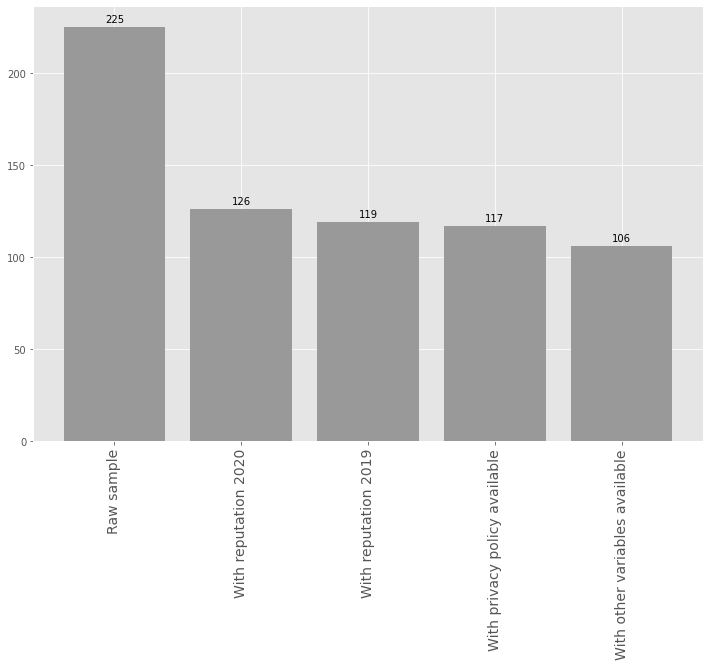

In [7]:
fig, ax = plt.subplots()
plotvalues = ax.bar(waterfall_on_selection.keys(), waterfall_on_selection.values(), color='#999')
ax.xaxis.set_tick_params(labelsize=14)
plt.xticks(rotation=90)
plt.bar_label(plotvalues, padding=3)
plt.show()